<a href="https://colab.research.google.com/github/ahmadbasyouni10/NYU-AI-School-Labs/blob/main/Lab_1_Regression_(advanced%3B_student).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Overview
=====================

While programming offers a powerful way to automate repetitive processes, it's only applicable if we are able to precisely specify and program the behavior we want. Machine learning offers us a way to avoid this need for exact specification by only requiring us to specify a goal, and then having an algorithm learn a way to achieve that goal.

The machine learning workflow typically consists of the following steps

1. Acquire and process data for the problem of interest
2. Choose a model
3. Define an objective
4. Train the model on the training data
5. Evaluate the trained model on the test data

We will walk through these steps in a simple but realistic setting.

**Goal of this tutorial:**

1. Review the basics of the Python programming language.  
2. Learn the basics of the PyTorch deep learning framework.  
3. Understand the machine learning workflow at a high level.

Link to this notebook: [bit.ly/NYUAIS-lab1](https://bit.ly/NYUAIS-lab1)

# Setup


This lab is a Colab notebook, an interactive Python environment.
A notebook consists of multiple text blocks (like this one) and code blocks. You can make new cells of either type by clicking the "+" buttons in the top left corner.  

You can write code blocks, and then execute the code by highlighting the block then pressing control+enter (or command+enter on Mac). You can also use shift+enter to execute the code and move to the next block. Try this with the following cell.


In [ ]:
%matplotlib inline

In [ ]:
a = 1

In [ ]:
b = 2

In [ ]:
a + b

3

In [ ]:
c = a * b

In [ ]:
c

2

# Python Review

For this lab and much of machine learning, we will use Python for its ease of understanding and large library ecosystem. Let's briefly go over Python syntax and features. You can skip this part if you are very familiar with this language.

### Functions

Functions are defined with the following syntax:
```
def function_name(arg1, args2=default2, ...):
    # function body
    return
```
Most of the time, your functions should return a value (possibly multiple values, separated by commas) using the `return` keyword, but this isn't a requirement. If you don't explicitly return something, the function will return the special `None` value by default.

Functions are called by using the function name followed by parentheses.
If you use the function name without parentheses, you are referring to the function itself, as an object.

Python contains many built-in functions. Some of these are straightforward math operators, (e.g. `+, -, /, *`), and others must be called using parentheses, such as `print()`, `int()`, `sum()`, or `len()`.

In [ ]:
def mean(a, b):
  return (a + b) / 2

In [ ]:
mean(3, 5)

4.0

### Data Structures

Python also has three built-in data structures that are very useful:

**Lists** are ordered lists and are created using brackets (`[]`) with comma-separated values. We can access list elements using the list name followed by the index of the element we want to access.

In [ ]:
list1 = [1, 2, 3]
print(list1[0]) # indexing
print(list1[1])
print(list1[-1]) # negative indexing
print(list1[:2]) # slicing

1
2
3
[1, 2]


In [ ]:
list2 = [1, "a", []] # list elements don't need to be the same type

In [ ]:
list3 = [] # defining empty list, also `list()`
print(list3)
list3.append(1) # add to a list
list3.append(2)
print(list3)
print(len(list3)) # get the length

[]
[1, 2]
2


In [ ]:
print(list2 + list3) # concatenation of two lists

[1, 'a', [], 1, 2]


**Dictionaries**, or hash tables, are sets of key-value pairs. We create dictionaries using curly braces (`{}`). We can access the value associated with a particular key by typing the name of the dictionary followed by the key in brackets. The key can be a variable or a literal (strings or numbers).


In [ ]:
d = {"apple": "a fruit", "banana": "an herb", "monkey": "a mammal"}
print(len(d)) # number of key-value pairs in d
print(d["apple"]) # accessing an element

3
a fruit


In [ ]:
d['broccoli'] = 'a vegetable' # assign a new key-value pair
del d['apple'] # delete a key-value pair
print("apple" in d) # check membership
key = "banana"
print(key in d) # variables as keys

False
True


In [ ]:
print(d.keys()) # unordered list of keys in the dictionary
print(d.values()) # unordered list of values in the dictionary

dict_keys(['banana', 'monkey', 'broccoli'])
dict_values(['an herb', 'a mammal', 'a vegetable'])


**Tuples** are also ordered lists of items, but unlike lists they cannot be changed (i.e., they're immutable). Tuples are created using parentheses and their elements can also be accessed using brackets.


In [ ]:
t = (1, 2, "cow")
print(t[-1])

cow


### Control Flow

Python supports standard control flow keywords such as
* `if`/`elif`/`else`
    ```
    if condition_a:
      # do something
    elif condition_b:
      # do something else
    else:
      # do something else instead
    ```
    Note that `elif` and `else` are not necessary.

* `for` loops:
    ```
    for iter_name in iterable: # e.g. a list like [1, 2, 3]
      # do something
      print(iter_name)
    ```
    
    Note that `iterable` can be any object that can be iterated over in order. Most commonly, `iterable` is a list. Dictionaries are not iterable as they are unordered. A useful built-in function is `range(n)`, which returns an iterable of all integers from 0 to n-1.
    

### Logic

* equals: `==` or `is`
    ```
    x = 5
    if x is 5:
      print("true")
    else:
      print("false")
    ```
* not: `!` or `not`
    ```
    x = 5
    if x != 5:
      print("false"):
    elif x is not 8:
      print("true")
    ```
* logical and/or: `and`/`or`
* greater/less than: `>`/`<`

In [ ]:
for i in range(5):
    if i % 2 == 0:
        print(i)

0
2
4


### Object Oriented Programming

A Python class contains the blueprints or the prototype from which the objects are being created. It contains some attributes and methods.

The ``__init__`` method is a special method that is similar to constructors in C++ and Java. It is run as soon as an object of a class is instantiated.

Other class methods must have an extra first parameter in the method definition, named ``self``. We do not give a value for this parameter when we call the method, Python provides it. In the code, ``self`` refers to the current object instance.



In [ ]:
class Dog(object):
    def __init__(self, name):
        self.name = name

    def speak(self):
        print("My name is", self.name)

In [ ]:
# Object instantiation
dog1 = Dog(name="Rodger")
dog2 = Dog("Tommy")

In [ ]:
# Accessing instance attributes
dog1.name

'Rodger'

In [ ]:
dog2.name

'Tommy'

In [ ]:
# Accessing class methods
dog1.speak()
dog2.speak()

My name is Rodger
My name is Tommy


# PyTorch



For the rest of the labs, we'll be using PyTorch, one machine learning framework. We'll briefly go over the basics of PyTorch here.

The material in this section is borrowed from [here](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)

**What is PyTorch?**

PyTorch is a Python-based scientific computing package serving two broad purposes:
* A replacement for NumPy to use the power of GPUs and other accelerators.
* An automatic differentiation library that is useful to implement neural networks.


## Tensors


Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other specialized hardware to accelerate computing. If you’re familiar with ndarrays, you’ll be right at home with the Tensor API. If not, follow along in this quick API walkthrough.

In [ ]:
import torch
import numpy as np

### Tensor Initialization

Tensors can be initialized in various ways. Take a look at the following examples:

**Directly from data**

Tensors can be created directly from data. The data type is automatically inferred.

In [ ]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

In [ ]:
x_data

tensor([[1, 2],
        [3, 4]])

In [ ]:
x_data.shape

torch.Size([2, 2])

**With constant or random values:**

Shape is a tuple of tensor dimensions. We can create tensors of specified shape with constant or random values.

In [ ]:
H, W = x_data.shape

x_ones = torch.ones((H, W)) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand((H, W), dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1., 1.],
        [1., 1.]]) 

Random Tensor: 
 tensor([[0.2005, 0.9210],
        [0.9861, 0.2325]]) 



### Tensor Attributes

Tensor attributes describe their shape, datatype, and the device on which they are stored.

In [ ]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


### Tensor Operations

Over 100 tensor operations, including transposing, indexing, slicing, mathematical operations, linear algebra, random sampling, and more are comprehensively described [here](https://pytorch.org/docs/stable/torch.html).

Each of them can be run on the GPU (at typically higher speeds than on a CPU). If you’re using Colab, allocate a GPU by going to Edit > Notebook Settings.

In [ ]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
  tensor = tensor.to('cuda')

In [ ]:
tensor.device

device(type='cpu')

Try out some of the operations from the list. If you’re familiar with the NumPy API, you’ll find the Tensor API a breeze to use.

**Indexing and slicing:**

In [ ]:
tensor = torch.rand(4, 4)

In [ ]:
tensor

tensor([[0.6986, 0.5414, 0.7906, 0.0761],
        [0.0508, 0.9440, 0.5739, 0.1096],
        [0.8479, 0.2090, 0.1259, 0.1537],
        [0.5107, 0.7313, 0.0930, 0.9180]])

In [ ]:
tensor[1]

tensor([0.0508, 0.9440, 0.5739, 0.1096])

In [ ]:
tensor[:,1] = 0
print(tensor)

tensor([[0.6986, 0.0000, 0.7906, 0.0761],
        [0.0508, 0.0000, 0.5739, 0.1096],
        [0.8479, 0.0000, 0.1259, 0.1537],
        [0.5107, 0.0000, 0.0930, 0.9180]])


In [ ]:
tensor[1:3, 2:4]

tensor([[0.5739, 0.1096],
        [0.1259, 0.1537]])

**Joining tensors** You can use torch.cat to concatenate a sequence of tensors along a given dimension. See also torch.stack, another tensor joining op that is subtly different from torch.cat.

In [ ]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[0.6986, 0.0000, 0.7906, 0.0761, 0.6986, 0.0000, 0.7906, 0.0761, 0.6986,
         0.0000, 0.7906, 0.0761],
        [0.0508, 0.0000, 0.5739, 0.1096, 0.0508, 0.0000, 0.5739, 0.1096, 0.0508,
         0.0000, 0.5739, 0.1096],
        [0.8479, 0.0000, 0.1259, 0.1537, 0.8479, 0.0000, 0.1259, 0.1537, 0.8479,
         0.0000, 0.1259, 0.1537],
        [0.5107, 0.0000, 0.0930, 0.9180, 0.5107, 0.0000, 0.0930, 0.9180, 0.5107,
         0.0000, 0.0930, 0.9180]])


**Multiplying tensors**

In [ ]:
tensor

tensor([[0.8212, 0.4926, 0.0753, 0.2879],
        [0.7353, 0.1215, 0.9958, 0.5032],
        [0.0921, 0.1040, 0.1170, 0.5537],
        [0.6406, 0.7512, 0.2604, 0.7975]])

In [ ]:
# This computes the element-wise product
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor}")

tensor.mul(tensor) 
 tensor([[0.6744, 0.2426, 0.0057, 0.0829],
        [0.5407, 0.0148, 0.9916, 0.2532],
        [0.0085, 0.0108, 0.0137, 0.3066],
        [0.4104, 0.5644, 0.0678, 0.6360]]) 

tensor * tensor 
 tensor([[0.6744, 0.2426, 0.0057, 0.0829],
        [0.5407, 0.0148, 0.9916, 0.2532],
        [0.0085, 0.0108, 0.0137, 0.3066],
        [0.4104, 0.5644, 0.0678, 0.6360]])


This computes the matrix multiplication between two tensors



In [ ]:
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[1.0056, 0.8835, 0.2951, 1.1453],
        [0.8835, 1.8003, 0.4755, 1.2229],
        [0.2951, 0.4755, 0.3396, 0.6092],
        [1.1453, 1.2229, 0.6092, 1.6785]]) 

tensor @ tensor.T 
 tensor([[1.0056, 0.8835, 0.2951, 1.1453],
        [0.8835, 1.8003, 0.4755, 1.2229],
        [0.2951, 0.4755, 0.3396, 0.6092],
        [1.1453, 1.2229, 0.6092, 1.6785]])


**In-place operations** Operations that have a _ suffix are in-place. For example: x.copy_(y), x.t_(), will change x.

In [ ]:
print(tensor, "\n")
tensor.add_(5)
# tensor += 5
print(tensor)

tensor([[5.8212, 5.4926, 5.0753, 5.2879],
        [5.7353, 5.1215, 5.9958, 5.5032],
        [5.0921, 5.1040, 5.1170, 5.5537],
        [5.6406, 5.7512, 5.2604, 5.7975]]) 

tensor([[10.8212, 10.4926, 10.0753, 10.2879],
        [10.7353, 10.1215, 10.9958, 10.5032],
        [10.0921, 10.1040, 10.1170, 10.5537],
        [10.6406, 10.7512, 10.2604, 10.7975]])


# Regression

Regression is the general problem of predicting the value of some quantity of interest given some inputs. Many real-world problems are regression problems, such as predicting
* how much money a movie will make
* the score of a basketball game
* the number of COVID cases

More formally, we describe the regression problem as learning a relationship, or function $f$, between a vector of **input features $x$** and an **output value $y$**. When we evaluate $f$ on a new input $x$, we want the model's prediction $f(x)$ to be close to the actual output $y$.

## Data

Before we discuss what the function $f$ looks like, we will first take a look at the data, which are the ($x$, $y$) pairs. For regression, the output value $y$ will be a scalar number. The input $x$ is a vector, each entry of which we call an **input feature**. An input feature is some property of the underlying problem that we believe might be predictive of the output. For example, if we are interested in predicting how well someone will score on a test, we might use the number of hours slept the night before as a feature. Though we don't know the exact mathematical relationship between an input feature and the output, we hope that our machine learning methods can learn a function that's close to the true relationship.

For this lab, we'll use a dataset of neighborhood features and try to predict the average house value (in units of 100K) in that neighborhood, though the methods used here will be applicable to any regression dataset you're interested in. We'll load this dataset using Scikit-learn; you can read about it [here](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [ ]:
data = fetch_california_housing()
X, y = data['data'], data['target']
print(X.shape)
print(y.shape)

(20640, 8)
(20640,)


In using machine learning methods, it's important that we first understand the data we're using to make sure the methods we're using are appropriate for the task at hand.

Let's first understand how much data we have and what a few examples from the dataset look like.

**Exercise**: Write code to do the following
* Print the first 5 examples
* Determine the number of data points we have
* Print the min, max, mean and median values for a feature.

In [ ]:
# YOUR CODE HERE
X = torch.tensor(X)
y = torch.tensor(y)

<ipython-input-54-319ac6168d82>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X)


In [ ]:
print(X[:5])
print(y[:5])

tensor([[ 8.3252e+00,  4.1000e+01,  6.9841e+00,  1.0238e+00,  3.2200e+02,
          2.5556e+00,  3.7880e+01, -1.2223e+02],
        [ 8.3014e+00,  2.1000e+01,  6.2381e+00,  9.7188e-01,  2.4010e+03,
          2.1098e+00,  3.7860e+01, -1.2222e+02],
        [ 7.2574e+00,  5.2000e+01,  8.2881e+00,  1.0734e+00,  4.9600e+02,
          2.8023e+00,  3.7850e+01, -1.2224e+02],
        [ 5.6431e+00,  5.2000e+01,  5.8174e+00,  1.0731e+00,  5.5800e+02,
          2.5479e+00,  3.7850e+01, -1.2225e+02],
        [ 3.8462e+00,  5.2000e+01,  6.2819e+00,  1.0811e+00,  5.6500e+02,
          2.1815e+00,  3.7850e+01, -1.2225e+02]], dtype=torch.float64)
tensor([4.5260, 3.5850, 3.5210, 3.4130, 3.4220], dtype=torch.float64)


In [ ]:
# Number of data points
X.shape[0]

20640

In [ ]:
def print_stats(idx):
    print("Feature", data['feature_names'][idx])
    print("Mean", X[:, idx].mean())
    print("Median", X[:, idx].median())
    print("Min", X[:, idx].min())
    print("Max", X[:, idx].max())

In [ ]:
print_stats(2)

Feature AveRooms
Mean tensor(5.4290, dtype=torch.float64)
Median tensor(5.2291, dtype=torch.float64)
Min tensor(0.8462, dtype=torch.float64)
Max tensor(141.9091, dtype=torch.float64)


Next, let's plot the data to get a sense of what it looks like.
Since the input consists of multiple features, we'll pick out one feature at a time and see what it looks like compared to the housing price.

**Exercise**: Write a function that takes in the index of a feature to look at, and generates the plot for that feature. You may want to google the usage of `plt.scatter()`.

In [ ]:
# YOUR CODE HERE
def plot_feature(idx):
    plt.scatter(X[:, idx], y)
    plt.ylabel("Average Housing Price")
    plt.xlabel(data['feature_names'][idx])
    plt.show()


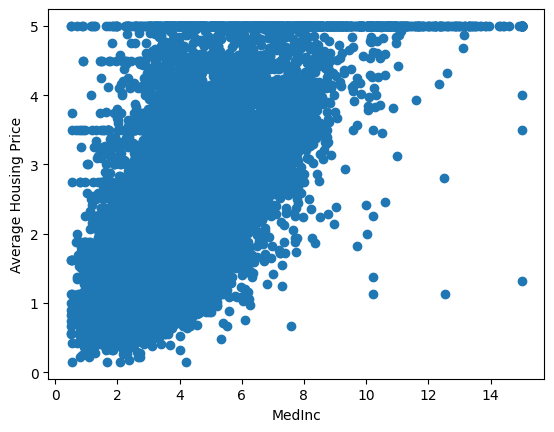

In [ ]:
plot_feature(0)

Here we provide some code that visualizes the distribution of each input feature with histograms. You do not need to fully understand how the code works.

In [ ]:
feature_names = data['feature_names']
df = pd.DataFrame(X, columns=feature_names)
df['Target'] = y

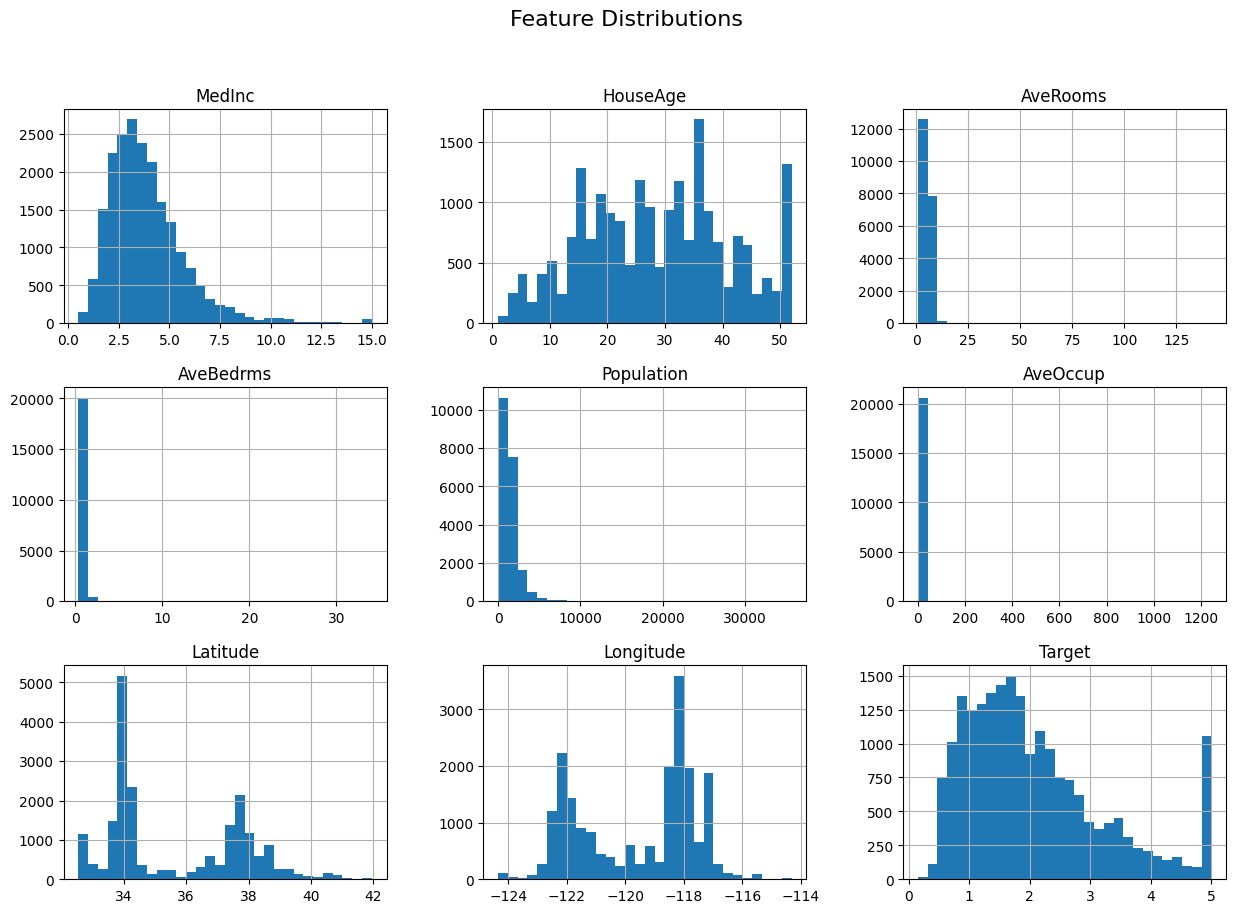

In [ ]:
# Plot the distribution of each feature
df.hist(bins=30, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

We can apply any transformations to the data that we think will help surface useful signal to our machine learning model. There is a lot of freedom and room for domain expertise in designing input features for any particular task. Here we use one of the most common preprocessing schemes called **standardization**, which removes the mean of each feature and scales it to unit variance.

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X[:5]

array([[ 2.34476576,  0.98214266,  0.62855945, -0.15375759, -0.9744286 ,
        -0.04959654,  1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, -0.26333577,  0.86143887,
        -0.09251223,  1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, -0.04901636, -0.82077735,
        -0.02584253,  1.03850269, -1.33282653],
       [ 0.93296751,  1.85618152,  0.15696608, -0.04983292, -0.76602806,
        -0.0503293 ,  1.03850269, -1.33781784],
       [-0.012881  ,  1.85618152,  0.3447108 , -0.03290586, -0.75984669,
        -0.08561576,  1.03850269, -1.33781784]])

When training a machine learning model, we don't just care about how well our model does on our data, but also any future data we might receive. In order to see how well our learned model performs on future data, we can split up our dataset into a **training set** and a **test set**.

In [ ]:
from sklearn.model_selection import train_test_split

# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)  # add a dimension for the target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<ipython-input-72-ff69dafd3616>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)  # add a dimension for the target


In [ ]:
X_train.shape

torch.Size([16512, 8])

In [ ]:
y_train.shape

torch.Size([16512, 1])


## Model

Now that we have looked at our data, we need to pick a type of model to learn from our data.
For this lab, we will use a simple linear model, where we assume that the relationship between the output variable and each input feature is linear.

Mathematically, we write this model as
$$ y = f(x) = b + \sum_{i=1}^m w_i x_i $$
where $i$ indexes each dimension in the $m$-dimensional input feature vector $x$.
Together, the $w_i$ and $b$ are called the **weights** or **parameters** of the model.
If $x$ is 1-dimensional, then we get $y = wx + b$; if $x$ is 2-dimensional, then we get $y = w_1 x_1 + w_2 x_2 + b$; and so forth.
Alternatively, we can write this as the dot product between the weights and the inputs
$$ y = x \cdot w $$
where $w$ is a vector representation of the $w_i$. To properly account for the bias term $b$, we append $b$ to $w$ (so that $w$ is $[w_1; w_2; \dots; w_m; b]$) and append a 1 to the input features $x$.


**Exercise**.
Let's write a function which takes in some weights $w$ and $b$ and an input $x$ and outputs the $y$ computed by this model. You can use a for-loop, but we recommend using a vector product (you might find `torch.dot()` useful).

In [ ]:
def linear(x, w, b):
  return torch.dot(w, x) + b

assert linear(torch.tensor([1]), torch.tensor([10]), 10) == 20

## Models in PyTorch

PyTorch provides a submodule for implementing and building machine learning models called `torch.nn` (`nn` for neural networks). `nn` implements many common mathematical transformations as functions that can be chained together to build machine learning modules. Let's go over an example of creating and using logistic regression in PyTorch.

In [ ]:
import torch.nn as nn
import torch.optim as optim

We implement models as classes that inherit from `nn.Module`.  
We initialize modules (and implicitly parameters) in `model.__init__()` and save them as attributes of the model.   
We then define the actual math of the model in `model.forward()`.

In [ ]:
# Define the regression model
class LinearRegressionModel(nn.Module):

    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, input):
        outputs = self.linear(input)  # includes the bias term
        return outputs


**Exercise**.
1. Print the shape of inputs to decide the dimensions of `input_dim`
2. Instantiate the model
3. Print the model
4. Print model weights and bias
5. Create dummy input, pass to the model, and print model output

In [ ]:
X_train.shape

torch.Size([16512, 8])

In [ ]:
# 1. Print the shape of inputs to decide the number of input dimensions
input_dim = X_train.shape[1]

# 2. Instantiate the model
model = LinearRegressionModel(input_dim=input_dim)

# 3. Print the model
print(model)

LinearRegressionModel(
  (linear): Linear(in_features=8, out_features=1, bias=True)
)


After we create an instance of the model, we can inspect the weights of each layer:

In [ ]:
# 4. Print model weights and bias
model.linear.weight

Parameter containing:
tensor([[-0.1519,  0.0375,  0.3350,  0.2417,  0.0768,  0.0385, -0.1032,  0.0623]],
       requires_grad=True)

In [ ]:
model.linear.bias

Parameter containing:
tensor([0.1708], requires_grad=True)

We can call the model as a function, which will under the hood call `model.forward()`

In [ ]:
# 5. Create dummy input and pass to the model
dummy_input = torch.rand(2, input_dim)
dummy_output = model(dummy_input)

In [ ]:
dummy_input

tensor([[0.3611, 0.7062, 0.0054, 0.1630, 0.6774, 0.9494, 0.0308, 0.3486],
        [0.4187, 0.8806, 0.2291, 0.3630, 0.4480, 0.8562, 0.3805, 0.0340]])

In [ ]:
dummy_output

tensor([[0.2908],
        [0.3349]], grad_fn=<AddmmBackward0>)


## Training

In order to use this model, we need to first set the value of the weights. But, we don't know what the ''right'' values are.
In order to do so, we first need to be able to say what constitutes good weights. Then, we can introduce an **objective function** that measures how good any set of weights are. Given this objective function, the best weights are the ones that maximize (or minimize) the objective function.

For regression, we'll use the **residual sum of squares** (RSS):
$$ L(w) = \sum_{d \in D} (y_d - f(x_d))^2 = \sum_{d \in D} (y_d - w \cdot x_d)^2 $$
where $D$ is our dataset of $(x ,y)$ pairs. Intuitively, this objective function looks at the distance from our model's predictions to the actual output. To pick the best $w$, then, we want to minimize this objective function.

In [ ]:
# Instantiate the model
model = LinearRegressionModel(input_dim)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop with loss tracking
num_epochs = 100

# Initialize the train_losses and test_losses and empty lists
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()

    # Forward pass
    # Call the model
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Track the loss
    # Append the loss to the train_losses list
    train_losses.append(loss.item())

    # Evaluate on test data
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test).item()
        # Append the loss to the test_losses list
        test_losses.append(test_loss)

    # Print the train and test loss when the current epoch divided by 10 gives a remainder of zero
    if (epoch + 1) % 10 == 0:
        print("Epoch", epoch+1)
        print("Train loss", loss.item())
        print("test loss", test_loss)


Epoch 10
Train loss 5.146739959716797
test loss 4.801764011383057
Epoch 20
Train loss 3.6502766609191895
test loss 3.399188756942749
Epoch 30
Train loss 2.6568503379821777
test loss 2.469644546508789
Epoch 40
Train loss 1.9943445920944214
test loss 1.8510557413101196
Epoch 50
Train loss 1.550779938697815
test loss 1.4380072355270386
Epoch 60
Train loss 1.25269615650177
test loss 1.16136634349823
Epoch 70
Train loss 1.0516091585159302
test loss 0.9755241870880127
Epoch 80
Train loss 0.9153705835342407
test loss 0.850259006023407
Epoch 90
Train loss 0.8225916624069214
test loss 0.7654816508293152
Epoch 100
Train loss 0.7590030431747437
test loss 0.7078060507774353


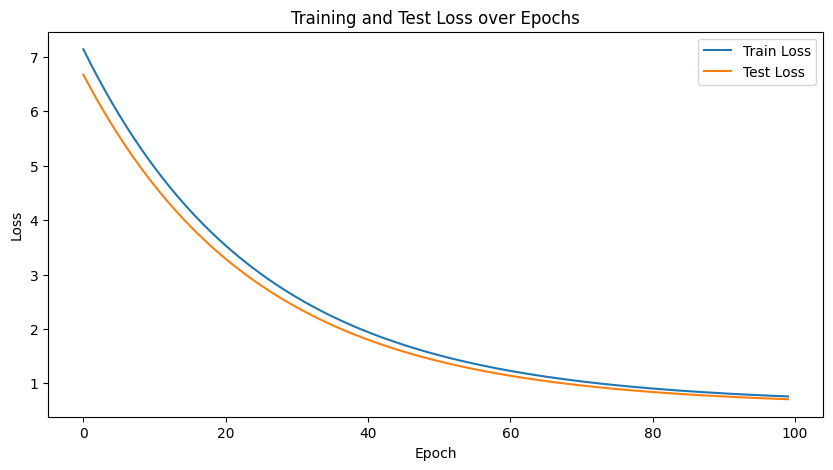

In [ ]:
# Plot training and test loss
plt.figure(figsize=(10, 5))
plt.plot(range(num_epochs), train_losses, label='Train Loss')
plt.plot(range(num_epochs), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss over Epochs')
plt.legend()
plt.show()


## Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
# Evaluate the model
model.eval()
with torch.no_grad():
    train_outputs = model(X_train)
    train_loss = criterion(train_outputs, y_train).item()

    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test).item()

    mae = mean_absolute_error(y_test, test_outputs)
    r2 = r2_score(y_test, test_outputs)
    print(f'Test MAE: {mae:.4f}')
    print(f'Test R²: {r2:.4f}')

    print(f'Final Train Loss: {train_loss:.4f}')
    print(f'Final Test Loss: {test_loss:.4f}')


Test MAE: 0.5868
Test R²: 0.4547
Final Train Loss: 0.7539
Final Test Loss: 0.7078


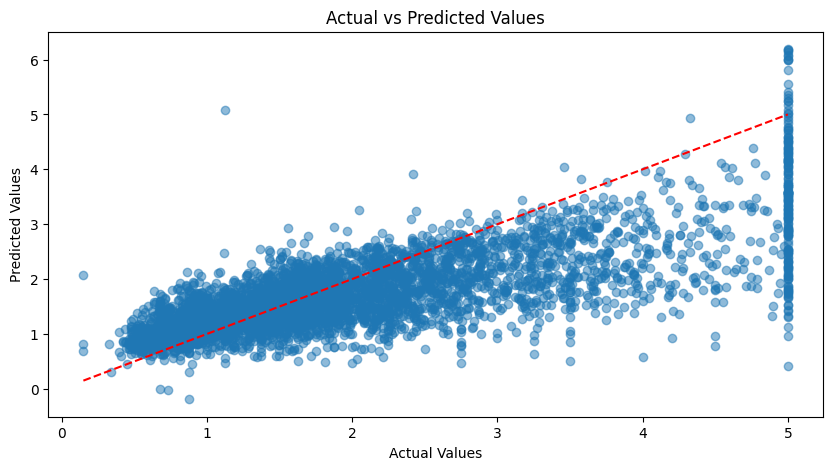

In [ ]:
# Visualization of Predictions vs Actual values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, test_outputs, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

A nice property of a linear model is that the weights are interpretable: We can look at the magnitude of the weights for each feature to get a sense of which features are most influential in predicting the output.

In [ ]:
print(model.linear.weight)

Parameter containing:
tensor([[ 0.7104,  0.0999,  0.0267, -0.0562, -0.0610, -0.0377, -0.1552, -0.1092]],
       requires_grad=True)


## Assignment: Read about `torch.autograd`

`torch.autograd` is PyTorch’s automatic differentiation engine that powers neural network training. In this section, you will get a conceptual understanding of how autograd helps a neural network train.

Neural networks (NNs) are a collection of nested functions that are executed on some input data. These functions are defined by parameters (consisting of weights and biases), which in PyTorch are stored in tensors.

Training a NN happens in two steps:

**Forward Propagation:** In forward prop, the NN makes its best guess about the correct output. It runs the input data through each of its functions to make this guess.

**Backward Propagation:** In backprop, the NN adjusts its parameters proportionate to the error in its guess. It does this by traversing backwards from the output, collecting the derivatives of the error with respect to the parameters of the functions (gradients), and optimizing the parameters using gradient descent. For a more detailed walkthrough of backprop, [check out this video from 3Blue1Brown](https://www.youtube.com/watch?v=tIeHLnjs5U8).